# Principal Component Analysis with Cancer Data

In [191]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [192]:
# reading the CSV file into pandas dataframe

data = pd.read_csv( r'C:\Users\ShruthiMrinalan\Documents\UnsupervisedNov1\r5lab\breast-cancer-wisconsin-data.csv') 
data.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [193]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [194]:
data.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Class,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


In [195]:
#Dropping the categorical feature from the dataframe for further analysis
#data.drop(['ID'],axis=1,inplace=True)
data.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [197]:
data.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [198]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [199]:
(data.astype(str) != '?').all(axis=0)

ID                              True
ClumpThickness                  True
Cell Size                       True
Cell Shape                      True
Marginal Adhesion               True
Single Epithelial Cell Size     True
Bare Nuclei                    False
Normal Nucleoli                 True
Bland Chromatin                 True
Mitoses                         True
Class                           True
dtype: bool

In [200]:
data['Bare Nuclei'].replace("?",1, inplace =True )

In [201]:
pd.value_counts(data['Bare Nuclei'])

1     402
10    132
2      30
5      30
3      28
8      21
4      19
1      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [202]:
(data.astype(str) != '?').all(axis=0)

ID                             True
ClumpThickness                 True
Cell Size                      True
Cell Shape                     True
Marginal Adhesion              True
Single Epithelial Cell Size    True
Bare Nuclei                    True
Normal Nucleoli                True
Bland Chromatin                True
Mitoses                        True
Class                          True
dtype: bool

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [204]:
data["Bare Nuclei"]=data["Bare Nuclei"].astype('int64')

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.2 KB


In [206]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
# I have already removed the corrupted rows in the step above

In [207]:
data[data.duplicated()]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
322,733639,3,1,1,1,2,1,3,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [208]:
data.shape

(699, 11)

In [209]:
data.duplicated().sum()

9

In [210]:
data=data.drop_duplicates(keep='first')

In [211]:
data.shape

(690, 11)

In [212]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [213]:
# Check for correlation of variable

#Checked which columns are numeric and then changed any non numeric values in numeric columns to NaN
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature]).codes # Replace strings with an integer

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 11 columns):
ID                             690 non-null int64
ClumpThickness                 690 non-null int64
Cell Size                      690 non-null int64
Cell Shape                     690 non-null int64
Marginal Adhesion              690 non-null int64
Single Epithelial Cell Size    690 non-null int64
Bare Nuclei                    690 non-null int64
Normal Nucleoli                690 non-null int64
Bland Chromatin                690 non-null int64
Mitoses                        690 non-null int64
Class                          690 non-null int64
dtypes: int64(11)
memory usage: 64.7 KB


In [215]:
data.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


In [216]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [217]:
#Let us check for pair plots

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


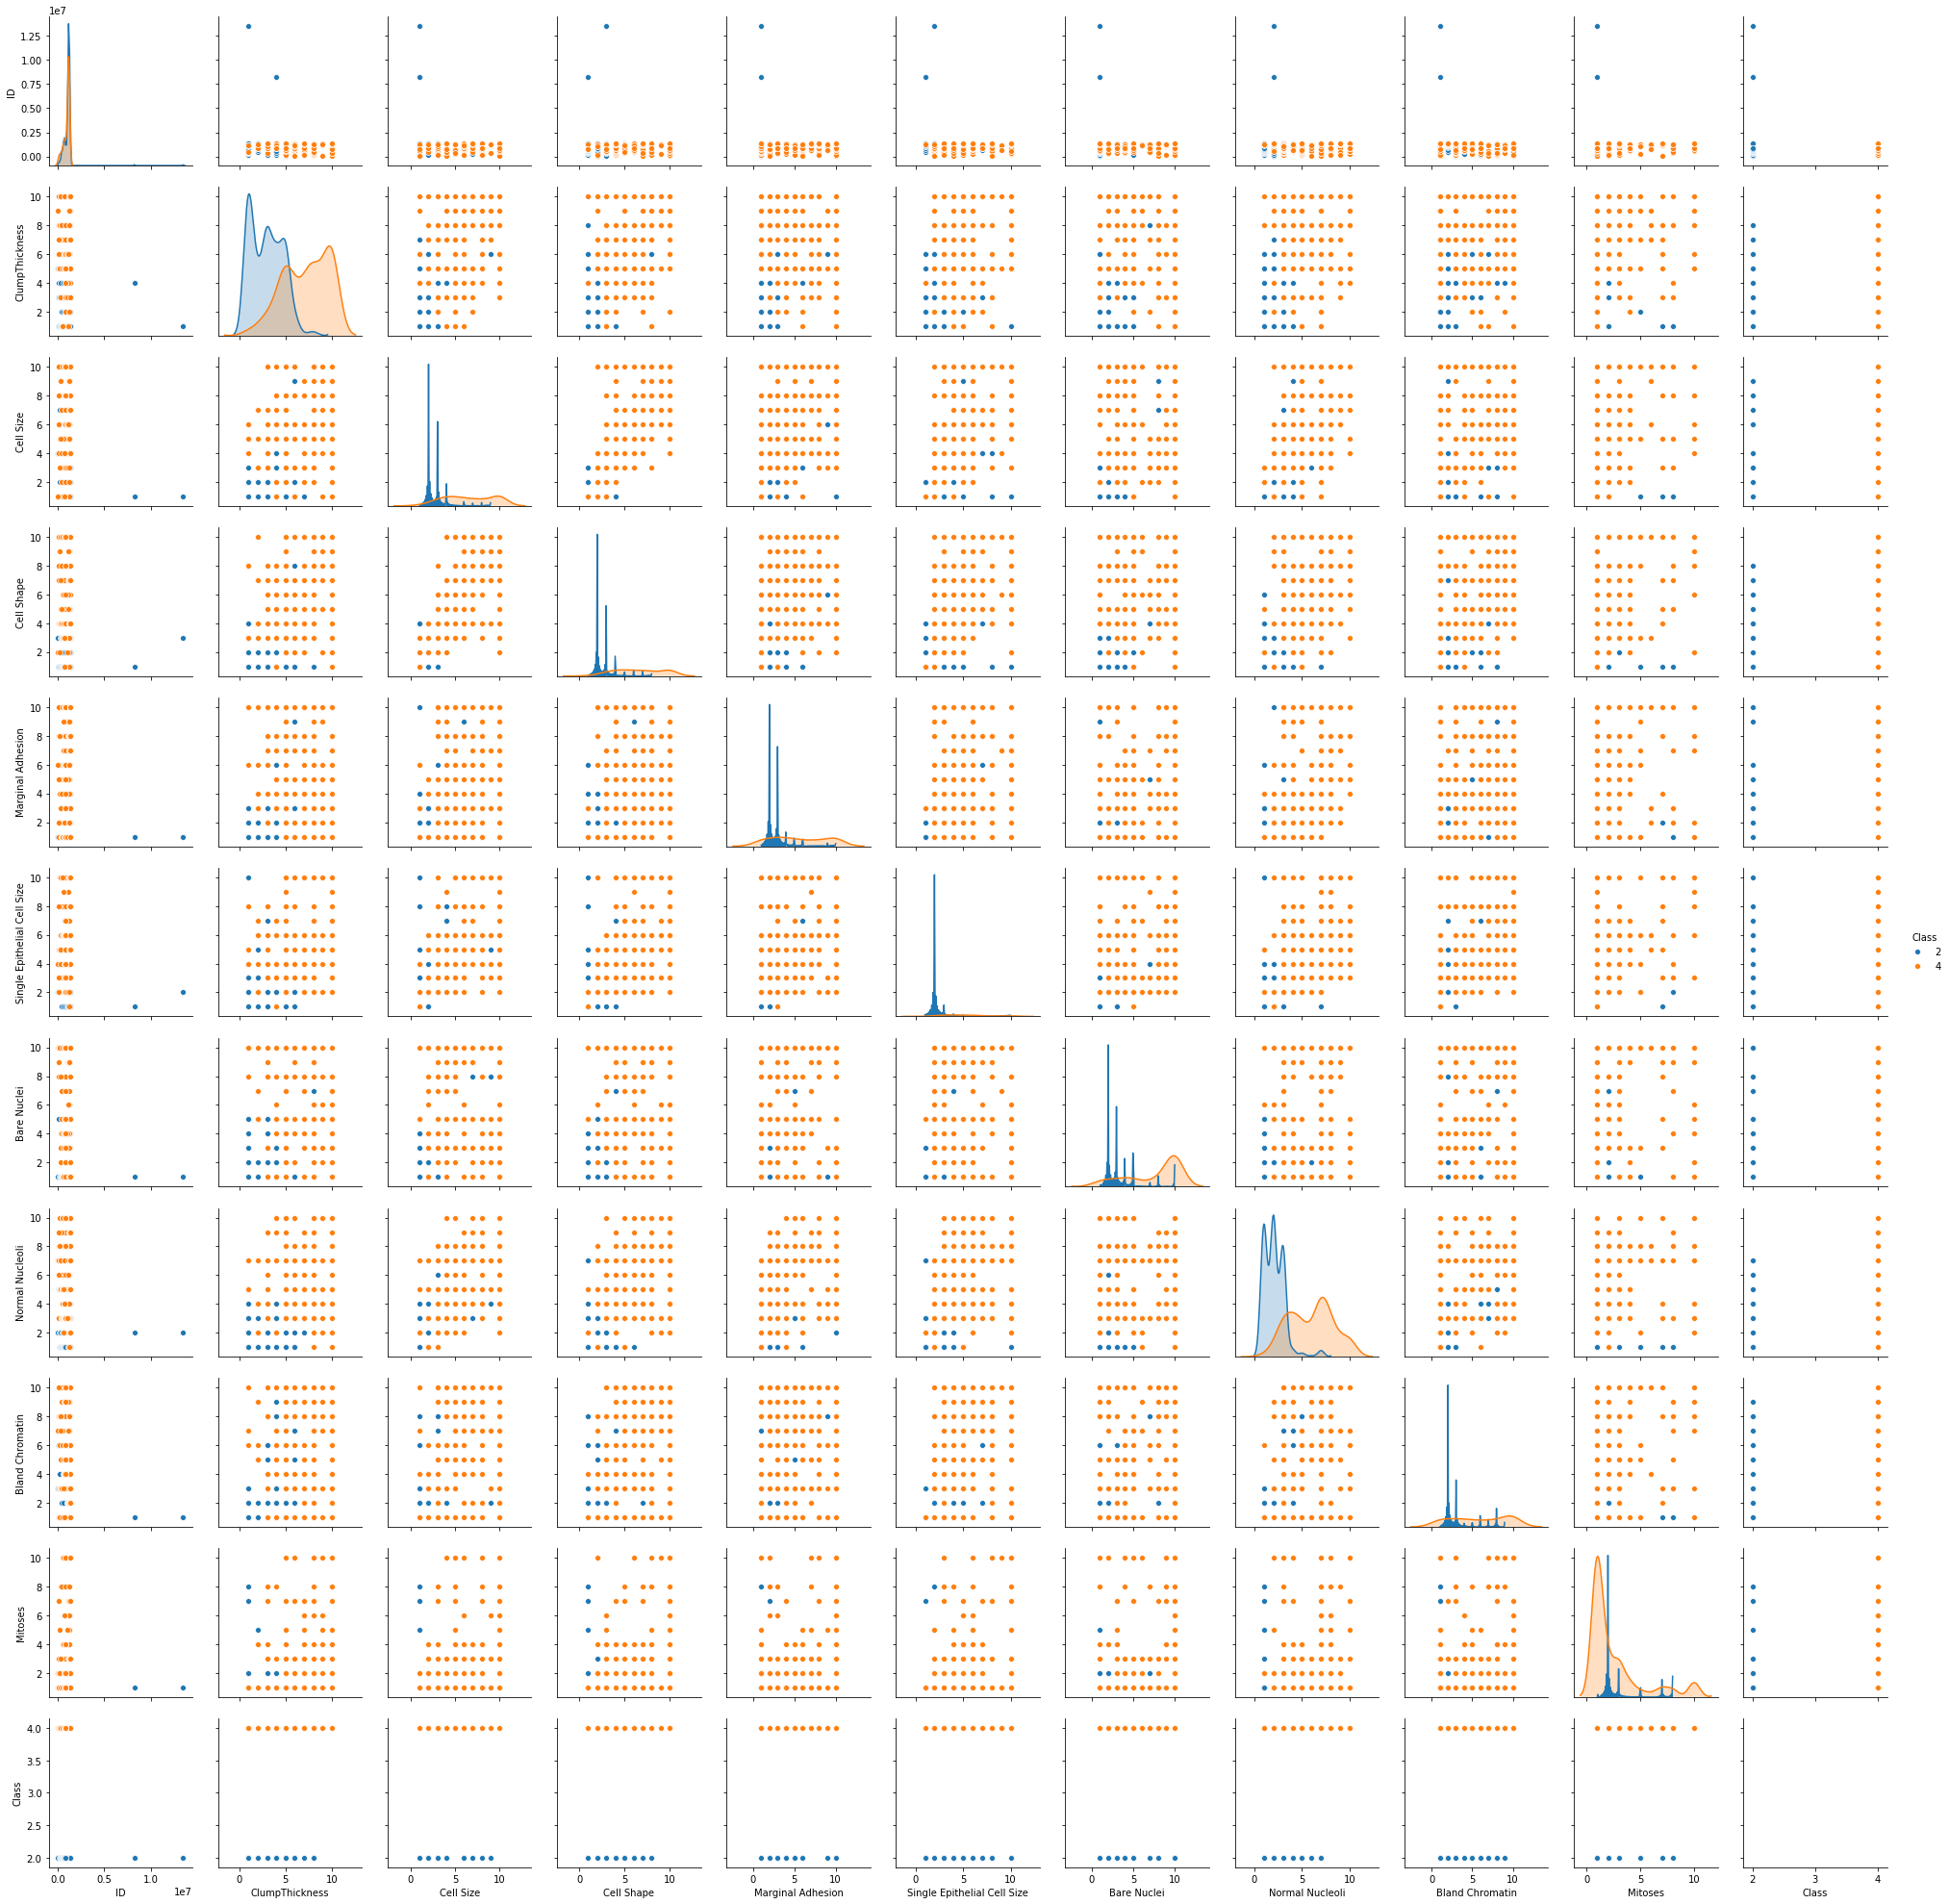

In [24]:
#pair plot 
sns.pairplot(data, hue="Class")

In [29]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [30]:
# We could see most of the outliers are now removed.

In [218]:
data.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.073826e+06,4.428986,3.133333,3.204348,2.827536,3.213043,3.482609,3.436232,2.885507,1.594203,2.689855
std,6.196092e+05,2.817378,3.042451,2.960844,2.867787,2.200964,3.617064,2.444060,3.067682,1.724230,0.951379
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.744845e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171752e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238450e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [219]:
data.drop(['ID'],axis=1,inplace=True)

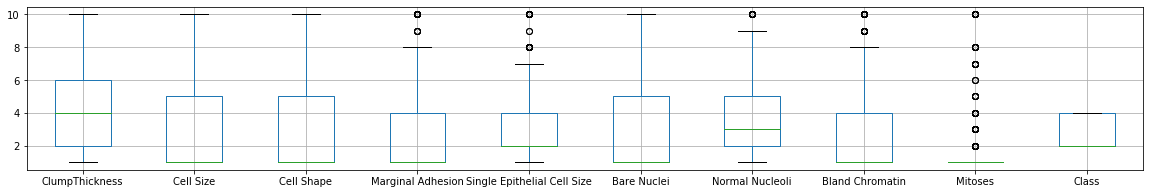

In [220]:
data.boxplot(figsize=(20,3))

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR) 

Q1 = data["Marginal Adhesion"].quantile(0.25)

Q3 = data["Marginal Adhesion"].quantile(0.75)

IQR = Q3 - Q1
print(IQR) 

In [222]:

data['Marginal Adhesion'] = np.where(data['Marginal Adhesion'] > 8, 8, data['Marginal Adhesion'])

In [223]:
data['Single Epithelial Cell Size'] = np.where(data['Single Epithelial Cell Size'] > 7, 7, data['Single Epithelial Cell Size'])

In [224]:
data['Normal Nucleoli'] = np.where(data['Normal Nucleoli'] > 9, 9, data['Normal Nucleoli'])

In [225]:
data['Bland Chromatin'] = np.where(data['Bland Chromatin'] > 8, 8, data['Bland Chromatin'])

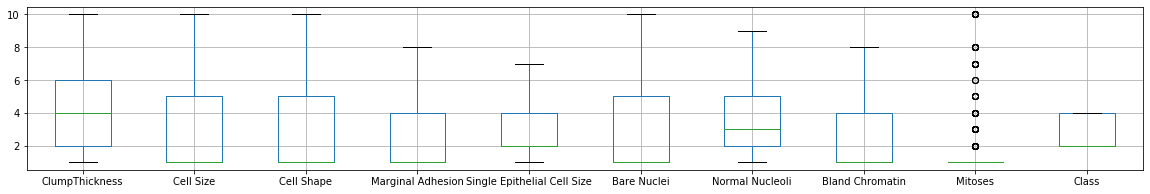

In [226]:
data.boxplot(figsize=(20,3))

In [227]:
#data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,4.428986,3.133333,3.204348,2.660870,3.047826,3.482609,3.407246,2.685507,1.594203,2.689855
std,2.817378,3.042451,2.960844,2.478542,1.769530,3.617064,2.370771,2.635240,1.724230,0.951379
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,8.000000,7.000000,10.000000,9.000000,8.000000,10.000000,4.000000


In [228]:
data['Mitoses'] = np.where(data['Mitoses'] > 2, 2, data['Mitoses'])

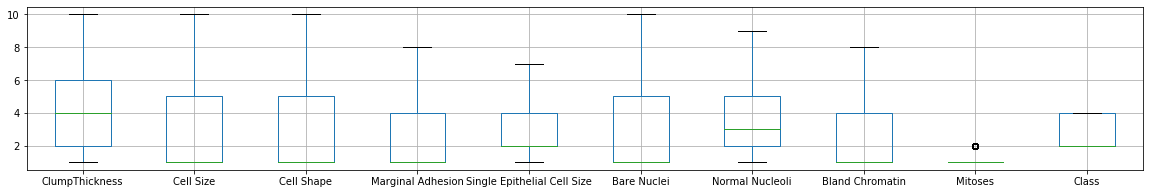

In [229]:
data.boxplot(figsize=(20,3))

# Q6 Create a covariance matrix for identifying Principal components

In [230]:
# split data table into data X and class labels y
X = data.drop(["Class"], axis=1)
y = data["Class"]
# standardize the data
from sklearn.preprocessing import StandardScaler
X_sd = StandardScaler().fit_transform(X)

In [231]:
# PCA
# Step 1 - Create covariance matrix
# Get eigen value and eigen vector from the variance covariance matriz
cov_matrix = np.cov(X_sd.T)
print('Covariance Matrix \n%s', cov_matrix)



Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.50566766 0.54660373 0.59150555
  0.56762194 0.54895554 0.44343056]
 [0.64410677 1.00145138 0.9066632  0.73190433 0.78174972 0.68556472
  0.76060761 0.7322064  0.49299528]
 [0.65453792 0.9066632  1.00145138 0.70664526 0.75160088 0.70518656
  0.73975369 0.72768806 0.46444631]
 [0.50566766 0.73190433 0.70664526 1.00145138 0.66784054 0.68919517
  0.68896322 0.6334195  0.44883871]
 [0.54660373 0.78174972 0.75160088 0.66784054 1.00145138 0.6263289
  0.66056222 0.68990315 0.47431449]
 [0.59150555 0.68556472 0.70518656 0.68919517 0.6263289  1.00145138
  0.68161737 0.60106392 0.46616061]
 [0.56762194 0.76060761 0.73975369 0.68896322 0.66056222 0.68161737
  1.00145138 0.6803516  0.39493876]
 [0.54895554 0.7322064  0.72768806 0.6334195  0.68990315 0.60106392
  0.6803516  1.00145138 0.49811301]
 [0.44343056 0.49299528 0.46444631 0.44883871 0.47431449 0.46616061
  0.39493876 0.49811301 1.00145138]]


In [232]:
# Step 2- Get eigen values and eigen vector

In [233]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
#e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-0.30026298  0.13779702 -0.87272271  0.00810817  0.07897684 -0.02376884
  -0.19438327  0.25065273  0.14740933]
 [-0.37381385 -0.12690801  0.01864274  0.73767763  0.21157741 -0.2125259
   0.34571741 -0.2518772   0.16354457]
 [-0.36965725 -0.15135672 -0.05699694 -0.65846244  0.18870425 -0.18267933
   0.5228656  -0.24105252  0.0561021 ]
 [-0.3356105  -0.13918396  0.30485932 -0.05219224 -0.43469583 -0.18852959
  -0.03299712  0.52478238  0.52090397]
 [-0.34295692 -0.06487088  0.22534458 -0.07235616  0.32327874 -0.5114311
  -0.56888099  0.03338    -0.3624169 ]
 [-0.33293395 -0.04125069 -0.10407837  0.08567594 -0.65458651  0.04048845
   0.15311739 -0.03380833 -0.64387105]
 [-0.3423679  -0.26344375  0.04301037 -0.06685406 -0.12357222  0.49759044
  -0.44937969 -0.52616498  0.2557425 ]
 [-0.3370778   0.01969008  0.20639897  0.03273396  0.41415147  0.61191381
   0.13840153  0.47337377 -0.23048025]
 [-0.24803785  0.92028536  0.18909457 -0.03677507 -0.06814486  0.01080713
  -0.00705

# Q8 Find variance and cumulative variance by each eigen vector

Cumulative Variance Explained [ 67.50552116  75.2594466   81.13228126  86.1303072   89.88731292
  93.0892767   96.20877934  99.0084161  100.        ]


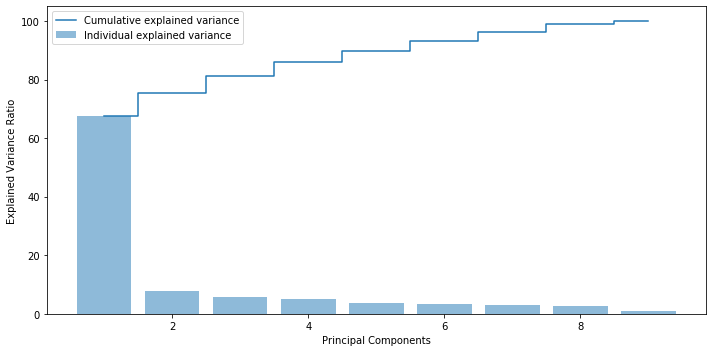

In [234]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [235]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 2 PCA dimensions (dimensionality reduction from 4 to 2)

pca = PCA(n_components=6)
data_reduced = pca.fit_transform(X_sd)
data_reduced.transpose()

array([[-1.52161586e+00,  1.69086453e+00, -1.64280899e+00, ...,
         4.40960804e+00,  2.24103946e+00,  2.65647886e+00],
       [ 2.43475293e-03, -7.79718330e-01, -1.06868277e-01, ...,
         7.80036663e-01, -1.46383216e+00, -1.68539533e+00],
       [-6.39933665e-01,  2.69445280e-01, -4.87511342e-02, ...,
         1.20763027e+00,  5.27806085e-01,  5.54251866e-01],
       [ 6.37703264e-02, -7.96690985e-01, -1.73437476e-01, ...,
         2.12473391e+00,  4.28141666e-01,  6.73652404e-02],
       [-1.99953727e-01,  1.61243132e+00, -2.28040839e-01, ...,
        -1.44542434e-01, -1.34845594e+00, -4.06075817e-01],
       [-2.33367341e-01,  1.42265754e+00,  4.94899258e-02, ...,
        -1.51872892e-01, -7.54036432e-01, -7.94229682e-01]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


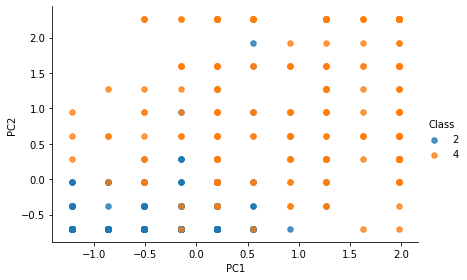

In [236]:
## Plot of PC1 and PC2
data["PC1"] = X_sd[:,0]
data["PC2"] = X_sd[:,1]

vis = sns.lmplot(data = data[["PC1","PC2","Class"]], x = "PC1", y = "PC2",fit_reg=False, hue = "Class",\
                 size = 4, aspect=1.5, scatter_kws = {'s':30}, )
vis.savefig("pca.png")

# Q10 Find correlation between components and features

In [129]:
# Loadings or Eigen vectors on the PCA components
pca.components_

array([[ 2.85509857e-01,  3.40352124e-01,  3.33487305e-01,
         2.94653101e-01,  3.04039326e-01,  2.94138867e-01,
         3.03479723e-01,  2.97566610e-01,  2.18292141e-01,
         2.85509857e-01,  3.40352124e-01],
       [-6.26308889e-01,  1.51682557e-01,  1.04449178e-01,
         2.48368021e-01,  1.97284061e-01,  3.45436730e-02,
         1.62166370e-01,  1.52714863e-01, -8.44323540e-02,
        -6.26308889e-01,  1.51682557e-01],
       [-1.11174160e-01, -1.16233893e-01, -1.41165555e-01,
        -3.94291359e-04,  1.92513647e-02,  1.34962184e-02,
        -1.84699486e-01,  1.03897166e-01,  9.39612060e-01,
        -1.11174160e-01, -1.16233893e-01],
       [ 7.80309235e-03,  2.75196002e-01,  1.91265592e-01,
        -4.42210851e-01,  2.37432411e-01, -6.76158221e-01,
        -2.32828177e-01,  2.17680453e-01,  3.34925645e-02,
         7.80309235e-03,  2.75196002e-01],
       [-2.82899927e-02,  2.81726164e-01,  1.96775979e-01,
         1.38838029e-01,  4.84890745e-02,  8.08098183e-02,
  

In [130]:
datacorr=pd.DataFrame(pca.components_, columns= list(X))

In [131]:
datacorr

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,PC1,PC2
0,0.285510,0.340352,0.333487,0.294653,0.304039,0.294139,0.303480,0.297567,0.218292,0.285510,0.340352
1,-0.626309,0.151683,0.104449,0.248368,0.197284,0.034544,0.162166,0.152715,-0.084432,-0.626309,0.151683
2,-0.111174,-0.116234,-0.141166,-0.000394,0.019251,0.013496,-0.184699,0.103897,0.939612,-0.111174,-0.116234
3,0.007803,0.275196,0.191266,-0.442211,0.237432,-0.676158,-0.232828,0.217680,0.033493,0.007803,0.275196
4,-0.028290,0.281726,0.196776,0.138838,0.048489,0.080810,-0.353160,-0.797575,0.109245,-0.028290,0.281726
5,0.073995,-0.204755,-0.177228,0.331814,0.703895,0.000750,-0.477121,0.093859,-0.178234,0.073995,-0.204755


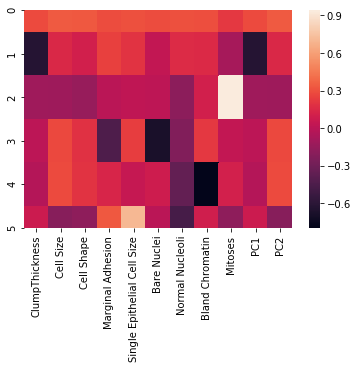

In [188]:
#Heatmap

sns.heatmap(datacorr)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [139]:
import numpy as np
import pandas as pd

In [140]:
DJ = pd.read_csv( r'C:\Users\ShruthiMrinalan\Documents\UnsupervisedNov1\r5lab\jokes.csv')
print(DJ.shape)
DJ.head()

(24983, 101)


,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [141]:
ratings=DJ.head(200)

In [165]:
r = ratings.iloc[:,1:]

# Q13 Change the column indices from 0 to 99

In [166]:
r.columns = range(100)

# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [167]:
ratings=r.replace(99.00,0)
ratings

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5.73,0.00,-0.58,1.75,2.86,7.23,2.04,-4.27,3.11,7.14,...,1.70,4.66,1.65,5.58,5.73,3.50,0.00,-2.04,2.91,1.84
196,1.80,5.39,8.06,-0.10,4.81,4.66,-7.09,-7.72,3.69,4.47,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
197,2.62,-3.79,-1.17,-0.44,-1.02,5.05,-3.69,2.18,3.30,-0.73,...,1.41,-2.52,-0.53,-1.89,1.17,-2.04,-1.17,-0.73,0.73,0.44
198,0.00,0.00,0.00,0.00,7.91,0.00,3.64,-1.89,0.00,0.00,...,2.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [178]:
ratings_diff = StandardScaler().fit_transform(ratings)

In [179]:
ratings_diff=pd.DataFrame(X_sd)

In [180]:
ratings_diff

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.156447,-0.121130,-0.183328,0.635932,0.534642,1.348587,0.332859,-0.862917,0.768008,1.250683,...,0.389092,1.417162,0.154845,1.425863,1.557140,1.036474,-0.233349,-0.611605,0.851903,0.403797
196,0.282432,0.978197,1.753872,0.155934,0.894403,0.762141,-1.293580,-1.574333,0.912012,0.715989,...,-0.192459,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
197,0.464796,-0.894126,-0.315613,0.067719,-0.181190,0.851135,-0.687896,0.467122,0.815182,-0.325362,...,0.289886,-0.851612,-0.528272,-0.729333,0.177949,-0.826352,-0.594963,-0.236106,0.182660,-0.025905
198,-0.117881,-0.121130,-0.053284,0.181880,1.466331,-0.301221,0.617887,-0.372143,-0.004146,-0.179172,...,0.820125,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [181]:
X_sd3=ratings_diff.describe()

In [182]:
rt = ratings_diff.mean()

In [183]:
rt.sort_values(ascending = False).head(10)

98    1.840889e-16
81    1.243450e-16
97    1.198694e-16
20    1.065814e-16
94    1.054712e-16
92    8.770762e-17
47    7.771561e-17
73    7.743806e-17
99    7.549517e-17
49    7.494005e-17
dtype: float64